# 2.4: Evaluating Hyperparameters
## Part 2: Deep Learning

## Table of Contents

#### 1. Importing Libraries and Data
#### 2. Data Wrangling
#### 3. Reshaping for Modeling
#### 4. Data Split
#### 5. Run Grid Searchn
#### 6. Evaluate Optimized Model(Grid Search)
#### 7. Run Random Research
#### 8. Evaluate Optimized Model(Random Search)
#### 9. Random Forest for Lejubljana data (all years) W/O optimization
#### 10. Random Forest for MASTRICHT data (all years) With optimization

## 1. Importing libraries and Data

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.multiclass import type_of_target
import tensorflow as tf
from numpy import unique
from numpy import reshape
from tensorflow.keras.models import Sequential
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasClassifier  # Use scikeras for scikit-learn compatibility
from math import floor
from bayes_opt import BayesianOptimization
from tensorflow.keras.layers import LeakyReLU  # Use tensorflow.keras instead of keras
LeakyReLU = LeakyReLU(negative_slope=0.1)
import warnings

In [2]:
#Create a path to where your data is stored.
path = r"C:\Users\Poory\OneDrive\Desktop\project\ClimateWins"

In [3]:
#Read in the European weather data and Answers Data set.

climate_sc = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'Unsupervised', 'climate_clean.csv'))
answers_sc = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'Unsupervised', 'answers_clean.csv'))

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
climate_sc.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,STOCKHOLM_humidity,MUNCHENB_pressure,KASSEL__cloud_cover
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,0.98,1.0304,8
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,0.62,1.0292,6
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0.00,0.6,2.7,1.7,5.3,6,0.92,1.0165,0.28,0.

In [6]:
climate_sc.shape

(22950, 135)

In [7]:
answers_sc

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Reshaping for modeling

In [8]:
X = climate_sc
y = answers_sc
X = np.array(X)
y = np.array(y)

In [9]:
X = X.reshape(-1,15,9)

In [10]:
X.shape

(22950, 15, 9)

In [11]:
# Use argmax to transform y

y =  np.argmax(y, axis = 1)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## The Bayesian optimization function only accepts y data in “multiclass” and “binary” layouts but not in “multilabel-indicator.”

In [12]:
# Check y layout

from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'multiclass'

### 3. Data Split 

In [13]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [14]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 15, 9) (17212,)
(5738, 15, 9) (5738,)


### 4. Bayesian Hyperparameter Optimization

In [15]:
# Determine the number of time steps for the input data
timesteps = X_train.shape[1]

# Determine the dimensionality of the input data
input_dim = X_train.shape[2]

# Specify the number of classes for the target variable
n_classes = 15  

# Create a scorer for accuracy
score_acc = make_scorer(accuracy_score)

In [16]:
# Create function
def bay_area(neurons, activation, kernel, optimizer, learning_rate, batch_size, epochs, layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl', 'SGD']
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential', LeakyReLU, 'relu']
    
    neurons = round(neurons)
    kernel = round(kernel)
    activation = activationL[round(activation)]
    optimizer_name = optimizerL[round(optimizer)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)

    def cnn_model():
        model = Sequential()
        model.add(Input(shape=(timesteps, input_dim)))
        model.add(Conv1D(neurons, kernel_size=kernel, activation=activation))
        if normalization > 0.5:
            model.add(BatchNormalization())
        for i in range(layers1):
            model.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            model.add(Dropout(dropout_rate, seed=127))
        for i in range(layers2):
            model.add(Dense(neurons, activation=activation))
        model.add(MaxPooling1D())
        model.add(Flatten())
        model.add(Dense(n_classes, activation='softmax'))  # sigmoid softmax
        
        # Create a new optimizer instance for each iteration
        if optimizer_name == 'Adam':
            optimizer_instance = Adam(learning_rate=learning_rate)
        elif optimizer_name == 'SGD':
            optimizer_instance = SGD(learning_rate=learning_rate)
        elif optimizer_name == 'RMSprop':
            optimizer_instance = RMSprop(learning_rate=learning_rate)
        elif optimizer_name == 'Adadelta':
            optimizer_instance = Adadelta(learning_rate=learning_rate)
        elif optimizer_name == 'Adagrad':
            optimizer_instance = Adagrad(learning_rate=learning_rate)
        elif optimizer_name == 'Adamax':
            optimizer_instance = Adamax(learning_rate=learning_rate)
        elif optimizer_name == 'Nadam':
            optimizer_instance = Nadam(learning_rate=learning_rate)
        elif optimizer_name == 'Ftrl':
            optimizer_instance = Ftrl(learning_rate=learning_rate)
        
        model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_instance, metrics=['accuracy'])
        return model

    # K-fold cross-validation
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=20)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=843)
    results = []
    for train, test in kfold.split(X, y):
        model = cnn_model()
        model.fit(X[train], y[train], epochs=epochs, batch_size=batch_size, verbose=0, callbacks=[es])
        scores = model.evaluate(X[test], y[test], verbose=1)
        results.append(scores[1])  # Assuming accuracy is the second metric
    return np.mean(results)

In [17]:
# Start timing the Bayesian Optimization process
start = time.time()

# Define the hyperparameter space for Bayesian Optimization
params = {
    'neurons': (10, 100),
    'kernel': (1, 3),
    'activation': (0, 9),  # 9
    'optimizer': (0, 7),  # 7
    'learning_rate': (0.001, 1),
    'batch_size': (200, 1000), #(10, 50), #
    'epochs': (20, 100),
    'layers1': (1, 3),
    'layers2': (1, 3),
    'normalization': (0, 1),
    'dropout': (0, 1),
    'dropout_rate': (0.3, 0.5)
}

# Run Bayesian Optimization
nn_opt = BayesianOptimization(bay_area, params, random_state=843)
nn_opt.maximize(init_points=15, n_iter=4)  # 25
print('Search took %s minutes' % ((time.time() - start)/60))

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  kernel   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7819 - loss: 0.5945
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7997 - loss: 0.6004
Epoch 20: early stopping
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7877 - loss: 0.5743
Epoch 20: early stopping
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7893 - loss: 0.5681
Epoch 20: early stopping
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8107 - loss: 0.5319
| 1         | 0.7908    | 3.046     | 294.6     | 0.91      | 0.4774    | 21.79     | 1.889     | 1.731     | 2.458     | 0.6151    | 93.83     | 0.07896   | 3.188     |
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [18]:
best_params = nn_opt.max['params']
best_score = nn_opt.max['target']

print(f"Best Parameters: {best_params}")
print(f"Highest Accuracy: {best_score}")

Best Parameters: {'activation': 3.0456692500080225, 'batch_size': 294.55712383240353, 'dropout': 0.9099719292290381, 'dropout_rate': 0.4774266686448506, 'epochs': 21.794437658596443, 'kernel': 1.8888829174734596, 'layers1': 1.731066277459519, 'layers2': 2.45752768846621, 'learning_rate': 0.6150734261709313, 'neurons': 93.82622674953835, 'normalization': 0.07896274589387753, 'optimizer': 3.188141189488114}
Highest Accuracy: 0.7908060789108277


In [19]:
# Retrieve the best parameters from the optimization result
optimum = nn_opt.max['params']

# Assign the best parameters to their respective variables
learning_rate = optimum['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential', 'LeakyReLU', 'relu']
activation = activationL[round(optimum['activation'])]

# Convert the hyperparameters to their integer form where necessary
optimum['batch_size'] = round(optimum['batch_size'])
optimum['epochs'] = round(optimum['epochs'])
optimum['layers1'] = round(optimum['layers1'])
optimum['layers2'] = round(optimum['layers2'])
optimum['neurons'] = round(optimum['neurons'])
optimum['kernel'] = round(optimum['kernel'])

optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
optimizerD = {
    'SGD': SGD(learning_rate=learning_rate),
    'Adam': Adam(learning_rate=learning_rate),
    'RMSprop': RMSprop(learning_rate=learning_rate),
    'Adadelta': Adadelta(learning_rate=learning_rate),
    'Adagrad': Adagrad(learning_rate=learning_rate),
    'Adamax': Adamax(learning_rate=learning_rate),
    'Nadam': Nadam(learning_rate=learning_rate),
    'Ftrl': Ftrl(learning_rate=learning_rate)
}

# Retrieve the optimizer name
optimizer_name = optimizerL[round(optimum['optimizer'])]

# Print the optimum parameters in a readable format
print(f"Best Parameters: ")
print(f"Activation: {activation}")
print(f"Batch Size: {optimum['batch_size']}")
print(f"Dropout Rate: {optimum['dropout_rate']:.4f}")
print(f"Epochs: {optimum['epochs']}")
print(f"Kernel Size: {optimum['kernel']}")
print(f"Layers1: {optimum['layers1']}")
print(f"Layers2: {optimum['layers2']}")
print(f"Learning Rate: {optimum['learning_rate']:.4f}")
print(f"Neurons: {optimum['neurons']}")
print(f"Normalization: {optimum['normalization']:.4f}")
print(f"Optimizer: {optimizer_name}")

Best Parameters: 
Activation: softsign
Batch Size: 295
Dropout Rate: 0.4774
Epochs: 22
Kernel Size: 2
Layers1: 2
Layers2: 2
Learning Rate: 0.6151
Neurons: 94
Normalization: 0.0790
Optimizer: Adadelta


## 5. Building the CNN Model with Optimized Hyperparameters

In [22]:
# Set the model with optimized hyperparameters

epochs = 22
batch_size = 295

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = 15

layers1 = 2
layers2 = 2
activation = 'softsign'
kernel = 2 # Rounded kernel size for Conv1D
neurons = 94
normalization = 0.07896274589387753
dropout = 0.9099719292290381
dropout_rate = 0.4774
optimizer = Adadelta(learning_rate=0.6151)  # Instantiate RMSprop with learning rate

model = Sequential()
model.add(Conv1D(neurons, kernel_size=kernel, activation=activation, input_shape=(timesteps, input_dim)))

if normalization > 0.5:
    model.add(BatchNormalization())

for i in range(layers1):
    model.add(Dense(neurons, activation=activation))

if dropout > 0.5:
    model.add(Dropout(dropout_rate))

for i in range(layers2):
    model.add(Dense(neurons, activation=activation))

model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax')) 

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_97"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_97 (Conv1D)                   │ (None, 14, 94)              │           1,786 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_470 (Dense)                    │ (None, 14, 94)              │           8,930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_471 (Dense)                    │ (None, 14, 94)              │           8,930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 14, 94)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_472 (Dense)                    │ (None, 14, 94)              │           8,930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_473 (Dense)                    │ (None, 14, 94)              │           8,930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_96 (MaxPooling1D)      │ (None, 7, 94)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_96 (Flatten)                 │ (None, 658)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_474 (Dense)                    │ (None, 15)                  │           9,885 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,391 (185.12 KB)

 Trainable params: 47,391 (185.12 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Put the y_test set back into a one-hot configuration

y_train_one_hot = to_categorical(y_train, num_classes=15)

In [25]:
# Check shapes

print(f'X_train shape: {X_train.shape}')
print(f'y_train_one_hot shape: {y_train_one_hot.shape}')

X_train shape: (17212, 15, 9)
y_train_one_hot shape: (17212, 15)


In [26]:
# Compile the model with categorical_crossentropy

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [27]:
# Fit the model to the data

model.fit(X_train, y_train_one_hot, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/22
59/59 - 5s - 87ms/step - accuracy: 0.6206 - loss: 1.2220
Epoch 2/22
59/59 - 1s - 21ms/step - accuracy: 0.6611 - loss: 0.9728
Epoch 3/22
59/59 - 1s - 20ms/step - accuracy: 0.7078 - loss: 0.8611
Epoch 4/22
59/59 - 1s - 19ms/step - accuracy: 0.7289 - loss: 0.7916
Epoch 5/22
59/59 - 1s - 20ms/step - accuracy: 0.7458 - loss: 0.7537
Epoch 6/22
59/59 - 1s - 21ms/step - accuracy: 0.7498 - loss: 0.7263
Epoch 7/22
59/59 - 1s - 20ms/step - accuracy: 0.7539 - loss: 0.7070
Epoch 8/22
59/59 - 1s - 21ms/step - accuracy: 0.7592 - loss: 0.6880
Epoch 9/22
59/59 - 1s - 21ms/step - accuracy: 0.7620 - loss: 0.6739
Epoch 10/22
59/59 - 1s - 21ms/step - accuracy: 0.7656 - loss: 0.6619
Epoch 11/22
59/59 - 1s - 21ms/step - accuracy: 0.7674 - loss: 0.6543
Epoch 12/22
59/59 - 1s - 21ms/step - accuracy: 0.7727 - loss: 0.6382
Epoch 13/22
59/59 - 1s - 21ms/step - accuracy: 0.7746 - loss: 0.6316
Epoch 14/22
59/59 - 1s - 21ms/step - accuracy: 0.7772 - loss: 0.6220
Epoch 15/22
59/59 - 1s - 21ms/step - accura

## ChatGPT Version

In [33]:
best_params = {'activation': 3.0456692500080225, 'batch_size': 294.55712383240353, 'dropout': 0.9099719292290381, 'dropout_rate': 0.4774266686448506, 'epochs': 21.794437658596443, 'kernel': 1.8888829174734596, 'layers1': 1.731066277459519, 'layers2': 2.45752768846621, 'learning_rate': 0.6150734261709313, 'neurons': 93.82622674953835, 'normalization': 0.07896274589387753, 'optimizer': 3.188141189488114}


# Extract rounded hyperparameters
activation = round(best_params['activation'])
batch_size = round(best_params['batch_size'])
dropout = best_params['dropout']
dropout_rate = best_params['dropout_rate']
epochs = round(best_params['epochs'])
kernel = round(best_params['kernel'])
layers1 = round(best_params['layers1'])
layers2 = round(best_params['layers2'])
learning_rate = best_params['learning_rate']
neurons = round(best_params['neurons'])
normalization = best_params['normalization']
optimizer_index = round(best_params['optimizer'])

In [34]:
# Define activation and optimizer lists
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential', LeakyReLU, 'relu']
optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl', 'SGD']

# Map the selected indices to the corresponding activation and optimizer
activation = activationL[activation]
optimizer_name = optimizerL[optimizer_index]

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl

def create_optimized_cnn():
    model = Sequential()
    model.add(Input(shape=(timesteps, input_dim)))
    model.add(Conv1D(neurons, kernel_size=kernel, activation=activation))
    if normalization > 0.5:
        model.add(BatchNormalization())
    for _ in range(layers1):
        model.add(Dense(neurons, activation=activation))
    if dropout > 0.5:
        model.add(Dropout(dropout_rate))
    for _ in range(layers2):
        model.add(Dense(neurons, activation=activation))
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))

    # Choose the optimizer
    if optimizer_name == 'Adam':
        optimizer_instance = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'SGD':
        optimizer_instance = SGD(learning_rate=learning_rate)
    elif optimizer_name == 'RMSprop':
        optimizer_instance = RMSprop(learning_rate=learning_rate)
    elif optimizer_name == 'Adadelta':
        optimizer_instance = Adadelta(learning_rate=learning_rate)
    elif optimizer_name == 'Adagrad':
        optimizer_instance = Adagrad(learning_rate=learning_rate)
    elif optimizer_name == 'Adamax':
        optimizer_instance = Adamax(learning_rate=learning_rate)
    elif optimizer_name == 'Nadam':
        optimizer_instance = Nadam(learning_rate=learning_rate)
    elif optimizer_name == 'Ftrl':
        optimizer_instance = Ftrl(learning_rate=learning_rate)

    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_instance, metrics=['accuracy'])
    return model


In [36]:
# Create the model
model = create_optimized_cnn()

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Accuracy with Optimized Parameters: {test_accuracy}")


Epoch 1/22
59/59 - 6s - 102ms/step - accuracy: 0.6344 - loss: 1.1921 - val_accuracy: 0.6741 - val_loss: 1.0185
Epoch 2/22
59/59 - 2s - 29ms/step - accuracy: 0.6886 - loss: 0.9687 - val_accuracy: 0.6962 - val_loss: 0.9249
Epoch 3/22
59/59 - 1s - 25ms/step - accuracy: 0.7111 - loss: 0.8879 - val_accuracy: 0.7098 - val_loss: 0.8532
Epoch 4/22
59/59 - 1s - 25ms/step - accuracy: 0.7247 - loss: 0.8275 - val_accuracy: 0.7229 - val_loss: 0.8261
Epoch 5/22
59/59 - 1s - 24ms/step - accuracy: 0.7424 - loss: 0.7769 - val_accuracy: 0.7395 - val_loss: 0.7785
Epoch 6/22
59/59 - 1s - 24ms/step - accuracy: 0.7456 - loss: 0.7452 - val_accuracy: 0.7494 - val_loss: 0.7203
Epoch 7/22
59/59 - 1s - 25ms/step - accuracy: 0.7588 - loss: 0.7114 - val_accuracy: 0.7382 - val_loss: 0.7936
Epoch 8/22
59/59 - 1s - 23ms/step - accuracy: 0.7645 - loss: 0.6944 - val_accuracy: 0.7611 - val_loss: 0.7031
Epoch 9/22
59/59 - 1s - 23ms/step - accuracy: 0.7687 - loss: 0.6782 - val_accuracy: 0.7701 - val_loss: 0.6960
Epoch 10/

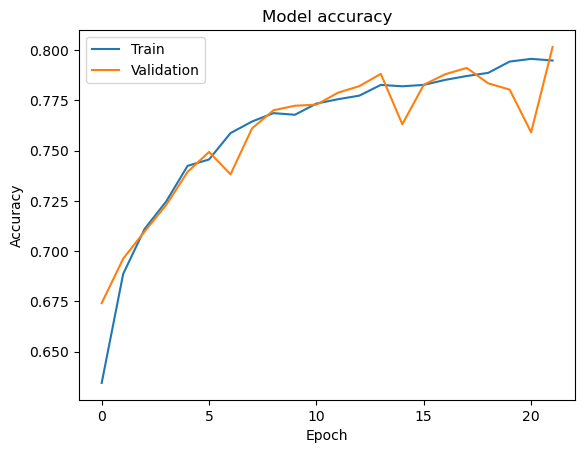

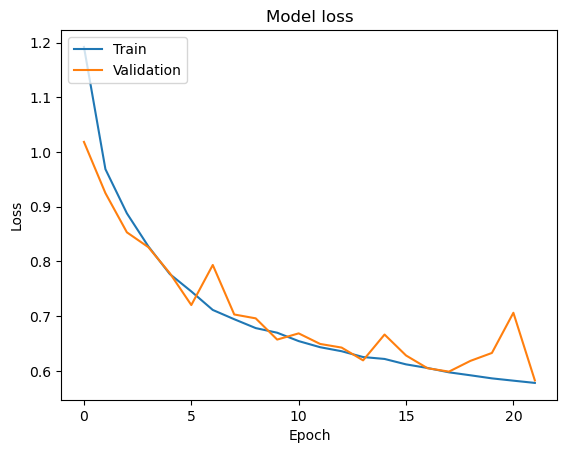

In [37]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## 7. Creating Confusion Matrix

In [38]:
# Define list of stations names

stations = {
0: 'BASEL',
1: 'BELGRADE',
2: 'BUDAPEST',
3: 'DEBILT',
4: 'DUSSELDORF',
5: 'HEATHROW',
6: 'KASSEL',
7: 'LJUBLJANA',
8: 'MAASTRICHT',
9: 'MADRID',
10: 'MUNCHENB',
11: 'OSLO',
12: 'SONNBLICK',
13: 'STOCKHOLM',
14: 'VALENTIA'
}

In [42]:
def confusion_matrix(y_true, y_pred, stations):
    # Check if y_true and y_pred are one-hot encoded or already class indices
    if y_true.ndim == 1:
        y_true_labels = y_true
    else:
        y_true_labels = np.argmax(y_true, axis=1)
    
    if y_pred.ndim == 1:
        y_pred_labels = y_pred
    else:
        y_pred_labels = np.argmax(y_pred, axis=1)
        
    # Map numeric labels to activity names
    y_true_series = pd.Series([stations[y] for y in y_true_labels])
    y_pred_series = pd.Series([stations[y] for y in y_pred_labels])
    
    return pd.crosstab(y_true_series, y_pred_series, rownames=['True'], colnames=['Pred'])

In [43]:
# Before making predictions, convert y_test to one-hot format
y_test_one_hot = to_categorical(y_test, num_classes=15)

In [44]:
# Before making predictions, convert y_test to one-hot format
y_test_one_hot = to_categorical(y_test, num_classes=15)

# Predict the class probabilities
y_pred = model.predict(X_test)

# Convert y_test and y_pred to class labels
if y_test_one_hot.ndim == 1:
    y_test_labels = y_test_one_hot
else:
    y_test_labels = np.argmax(y_test_one_hot, axis=1)

if y_pred.ndim == 1:
    y_pred_labels = y_pred
else:
    y_pred_labels = np.argmax(y_pred, axis=1)

# Manually calculate accuracy
correct_predictions = np.sum(y_test_labels == y_pred_labels)
total_samples = len(y_test_labels)
accuracy = correct_predictions / total_samples

print(f'Accuracy: {accuracy * 100:.2f}%')


180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Accuracy: 80.17%


In [45]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [46]:
# Convert y_test_one_hot back to class labels
y_test_labels = np.argmax(y_test_one_hot, axis=1)

In [47]:
# Evaluate

print(confusion_matrix(y_test, y_pred, stations))

Pred        BASEL  BELGRADE  BUDAPEST  DEBILT  HEATHROW  LJUBLJANA  MADRID
True                                                                      
BASEL        3422       184        21       4         3          0      48
BELGRADE      267       782        15       1         0          2      25
BUDAPEST       61        78        51       3         4          1      16
DEBILT         37        16        10      12         2          0       5
DUSSELDORF     14         8         3       1         1          0       2
HEATHROW       29        10         7       1        12          1      22
KASSEL          6         3         2       0         0          0       0
LJUBLJANA      22        11         4       0         0          9      15
MAASTRICHT      9         0         0       0         0          0       0
MADRID         66        60        14       2         2          2     312
MUNCHENB        8         0         0       0         0          0       0
OSLO            0        